## **Import Library**

In [272]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from scipy.stats.mstats import winsorize

In [83]:
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# **Data Preparation**

## **Load Dataset**

In [3]:
filepath1 = 'https://raw.githubusercontent.com/BimaBayuUWUUU/DSAI_Batch6_Code/main/Dataset/train.csv'

In [4]:
df1 = pd.read_csv(filepath1)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df1.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [7]:
df_fix = df1.copy()
df_fix[['MSSubClass', 'OverallQual', 'OverallCond']] = df1[['MSSubClass', 'OverallQual', 'OverallCond']].astype(str)

In [8]:
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

## **Mencari missing value dan mengatasi masalah missing value jika ada.**

### **Menemukan Missing Value**

In [9]:
def display_null_columns(df):
    null_values = df.isnull()

    null_count = null_values.sum()
    
    null_columns = null_count[null_count > 0]

    if not null_columns.empty:
        print("Kolom yang memiliki nilai null, jumlah null, dan tipe data kolomnya:")
        null_info = pd.concat([null_columns, df[null_columns.index].dtypes], axis=1)
        null_info.columns = ['Jumlah Null', 'Tipe Data']
        print(null_info)
    else:
        print("Tidak ada nilai null dalam DataFrame.")

In [10]:
display_null_columns(df_fix)

Kolom yang memiliki nilai null, jumlah null, dan tipe data kolomnya:
              Jumlah Null Tipe Data
LotFrontage           259   float64
Alley                1369    object
MasVnrType            872    object
MasVnrArea              8   float64
BsmtQual               37    object
BsmtCond               37    object
BsmtExposure           38    object
BsmtFinType1           37    object
BsmtFinType2           38    object
Electrical              1    object
FireplaceQu           690    object
GarageType             81    object
GarageYrBlt            81   float64
GarageFinish           81    object
GarageQual             81    object
GarageCond             81    object
PoolQC               1453    object
Fence                1179    object
MiscFeature          1406    object


### **Memperbaiki Mising Value pada data String**

#### Data yang memang memiliki kategori nilai **None** atau **NA**.

1. Alley
2. MasVnrType
3. BsmtQual
4. BsmtCond
5. BsmtExposure
6. BsmtFinType1
7. BsmtFinType2
8. FireplaceQu
9. GarageType
10. GarageFinish
11. GarageQual
12. GarageCond
13. PoolQC
14. Fence
15. MiscFeature

#### Data yang tidak memiliki kategori nilai **None** atau **NA**.


1. MSZoning
2. Utilities
3. Exterior1st
4. Exterior2nd
5. Electrical
6. KitchenQual
7. Functional
8. SaleType

#### Mengubah nilai **None** atau **NA** menjadi **Without**.

In [11]:
def replace_na_with_without(df, columns_to_update):
    df_copy = df.copy()
    for col in columns_to_update:
        df_copy[col] = df_copy[col].fillna('Without')
        
    return df_copy

In [12]:
columns_to_update = [
    'Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
    'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
    'MiscFeature'
]

df_modified = replace_na_with_without(df_fix, columns_to_update)

In [13]:
display_null_columns(df_modified)

Kolom yang memiliki nilai null, jumlah null, dan tipe data kolomnya:
             Jumlah Null Tipe Data
LotFrontage          259   float64
MasVnrArea             8   float64
Electrical             1    object
GarageYrBlt           81   float64


#### Memperbaiki Missing Value pada data String tanpa kategorikal **NA/None** menggunkana **modus**

In [14]:
def fill_na_with_mode(df, columns_to_fill):
    
    df_copy = df.copy()
    for col in columns_to_fill:
        mode_value = df_copy[col].mode()[0] 
        df_copy[col] = df_copy[col].fillna(mode_value)
        
    return df_copy

In [15]:
columns_to_fill = ['Electrical']

df_filled = fill_na_with_mode(df_modified, columns_to_fill)

In [16]:
display_null_columns(df_filled)

Kolom yang memiliki nilai null, jumlah null, dan tipe data kolomnya:
             Jumlah Null Tipe Data
LotFrontage          259   float64
MasVnrArea             8   float64
GarageYrBlt           81   float64


### **Memperbaiki Mising Value pada data Float**

#### Mengisi menggunakan **mean**. 

In [17]:
def fill_null_with_mean(df, columns_with_null):
    df_copy = df.copy()
    for col in columns_with_null:
        df_copy[col] = df_copy[col].fillna(df[col].mean())
        
    return df_copy

In [18]:
# Daftar kolom yang ingin diisi nilai NaN dengan meannya
columns_with_null = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
# Panggil fungsi untuk mengisi nilai NaN dengan modus untuk setiap kolom yang ditentukan
df_missing_fixed = fill_null_with_mean(df_filled, columns_with_null)

In [19]:
display_null_columns(df_missing_fixed)

Tidak ada nilai null dalam DataFrame.


In [20]:
df_missing_fixed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

## **Mencari duplicate value dan menyelesaikan masalah duplicate value jika ada.**

### **Menemukan duplicate value**

In [21]:
def check_duplicate_ids(df):
    duplicate_all= df.duplicated()
    
    duplicate_rows = df[duplicate_all]
    
    if not duplicate_rows.empty:
        print("Ada Data yang duplikat:")
        print(duplicate_rows)
    else:
        print("Tidak ada Data duplikat dalam DataFrame.")

In [22]:
check_duplicate_ids(df_missing_fixed)

Tidak ada Data duplikat dalam DataFrame.


Duplikasi data tidak ditemukan dalam dataset. Maka tidak perlu dilakukan tindakan apapun.

In [23]:
df_missing_fixed.head(5)

Id MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0   1         60       RL         65.0     8450   Pave  Without      Reg   
1   2         20       RL         80.0     9600   Pave  Without      Reg   
2   3         60       RL         68.0    11250   Pave  Without      IR1   
3   4         70       RL         60.0     9550   Pave  Without      IR1   
4   5         60       RL         84.0    14260   Pave  Without      IR1   

  LandContour Utilities  ... PoolArea   PoolQC    Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0  Without  Without     Without       0   
1         Lvl    AllPub  ...        0  Without  Without     Without       0   
2         Lvl    AllPub  ...        0  Without  Without     Without       0   
3         Lvl    AllPub  ...        0  Without  Without     Without       0   
4         Lvl    AllPub  ...        0  Without  Without     Without       0   

  MoSold YrSold SaleType SaleCondition  SalePrice  
0      2   2008       WD        Normal     208500  
1      5   2007       WD        Normal     181500  
2      9   2008       WD        Normal     223500  
3      2   2006       WD       Abnorml     140000  
4     12   2008       WD        Normal     250000  

[5 rows x 81 columns]

In [24]:
df_missing_fixed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

## **Memeriksa outlier dan menangani outlier jika ada.**

### **Menemukan Outlier**

#### ScatterPlot

In [25]:
def plot_scatterplot(df, figsize=(12, 36)):
    
    numeric_columns = df.select_dtypes(include='number').columns
    num_plots = len(numeric_columns)
    num_cols = 4

    num_rows = num_plots // num_cols
    if num_plots % num_cols:
        num_rows += 1

    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)

    for i, column in enumerate(numeric_columns):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col] if num_rows > 1 else axes[col]

        sns.scatterplot(data=df, x=df.Id, y=column, ax=ax)
        ax.set_title(f'Scatterplot {column}')

    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

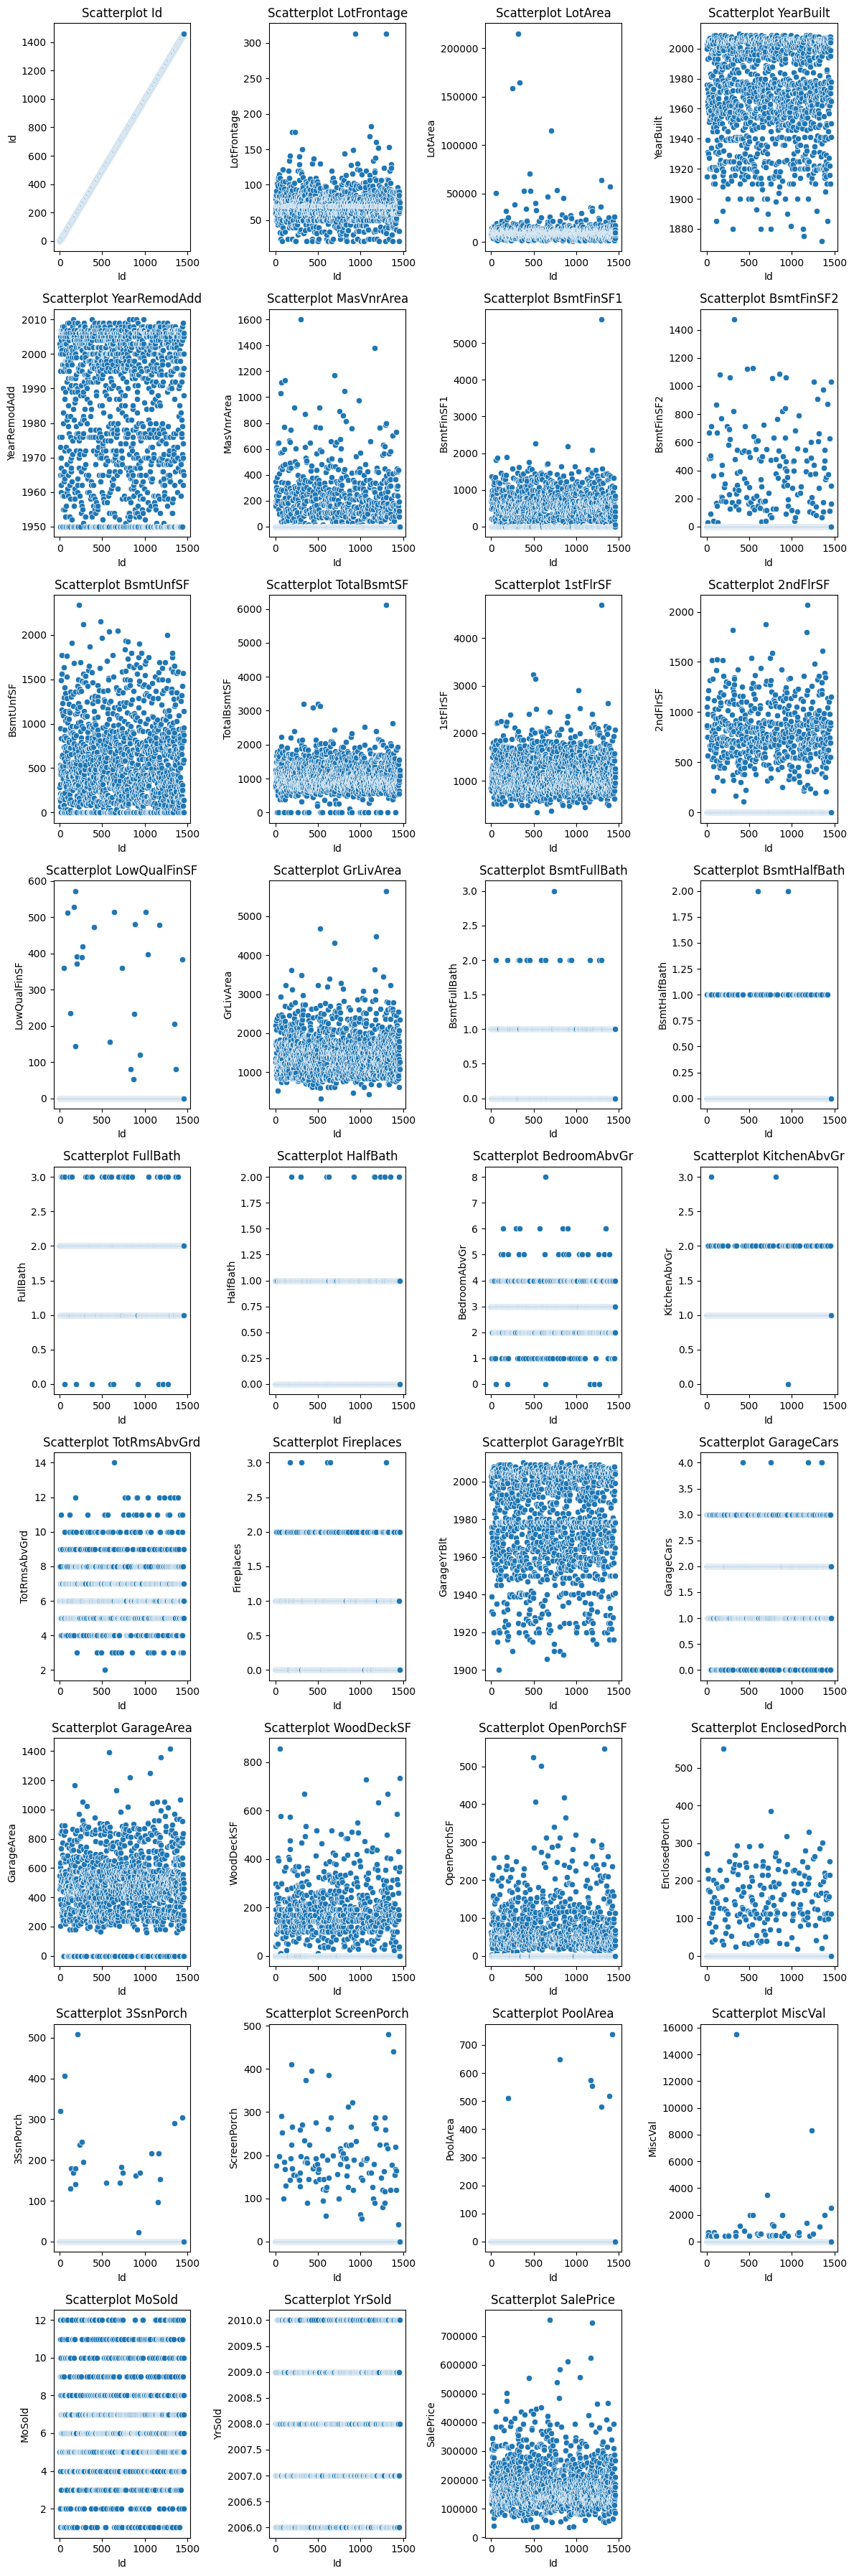

In [26]:
plot_scatterplot(df_missing_fixed)

#### Boxplot

In [27]:
def plot_boxplot(df, figsize=(12, 36)):
    numeric_columns = df.select_dtypes(include='number').columns
    num_plots = len(numeric_columns)
    num_cols = 4 

    num_rows = num_plots // num_cols
    if num_plots % num_cols:
        num_rows += 1

    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)

    for i, column in enumerate(numeric_columns):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col] if num_rows > 1 else axes[col]

        sns.boxplot(y=df[column], ax=ax)
        ax.set_title(f'Boxplot {column}')

    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

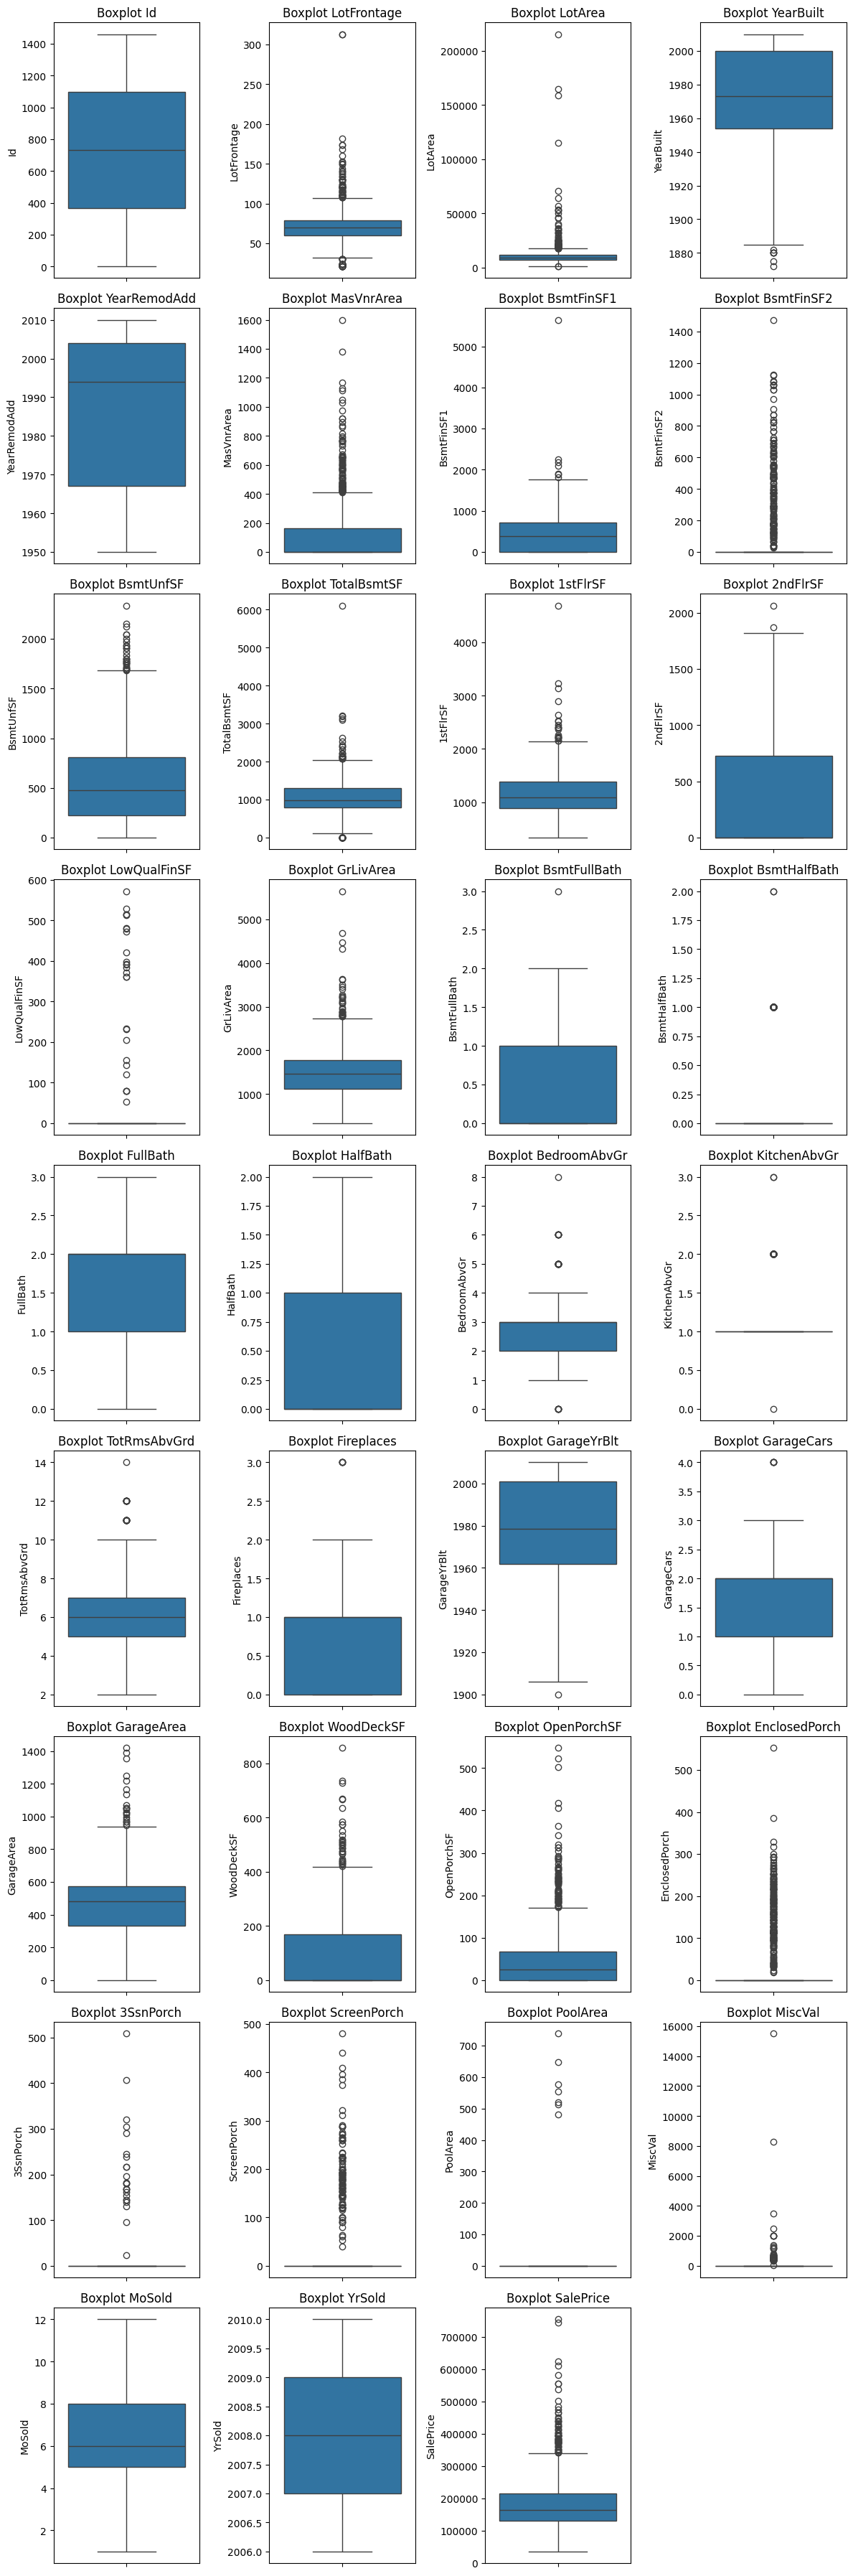

In [28]:
plot_boxplot(df_missing_fixed)

#### Fungsi Check Outlier

In [61]:
def detect_outliers_columns(df):
    outliers_columns = []  # List untuk menyimpan nama kolom yang mengandung outlier
    
    # Iterasi melalui setiap kolom numerik
    for column_name in df.select_dtypes(include='number').columns:
        # Menghitung kuartil ke-1 dan kuartil ke-3
        q1 = df[column_name].quantile(0.25)
        q3 = df[column_name].quantile(0.75)
        
        # Menghitung rentang interkuartil (IQR)
        iqr = q3 - q1
        
        # Menentukan batas atas dan batas bawah untuk outlier
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # Mendeteksi apakah ada outlier dalam kolom saat ini
        if (df[column_name] < lower_bound).any() or (df[column_name] > upper_bound).any():
            outliers_columns.append(column_name)
    
    return outliers_columns

In [62]:
# Mendeteksi kolom dengan outlier dalam DataFrame
kolom_outlier = detect_outliers_columns(df_missing_fixed)

jumlah_kolom_outlier = len(kolom_outlier)

print("Kolom dengan outlier:")
print(kolom_outlier)
print("Jumlah kolom dengan outlier:", jumlah_kolom_outlier)

Kolom dengan outlier:
['LotFrontage', 'LotArea', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']
Jumlah kolom dengan outlier: 29


### **Mengatasi Outlier**

#### Mengatasi Outlier dengan Winsorization

In [79]:
def transform_outliers(df):
    df_copy = df.copy()
    
    numeric_columns = df_copy.select_dtypes(include='number').columns
    
    for column in numeric_columns:
        q1 = df_copy[column].quantile(0.25)
        q3 = df_copy[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        if (df_copy[column] < lower_bound).any() or (df_copy[column] > upper_bound).any():
            values = df_copy[column].values
            winsorized_data = winsorize(values, limits=[0.05, 0.05])
            df_copy[column] = winsorized_data
        
    return df_copy

In [80]:
df_otc = transform_outliers(df_missing_fixed)

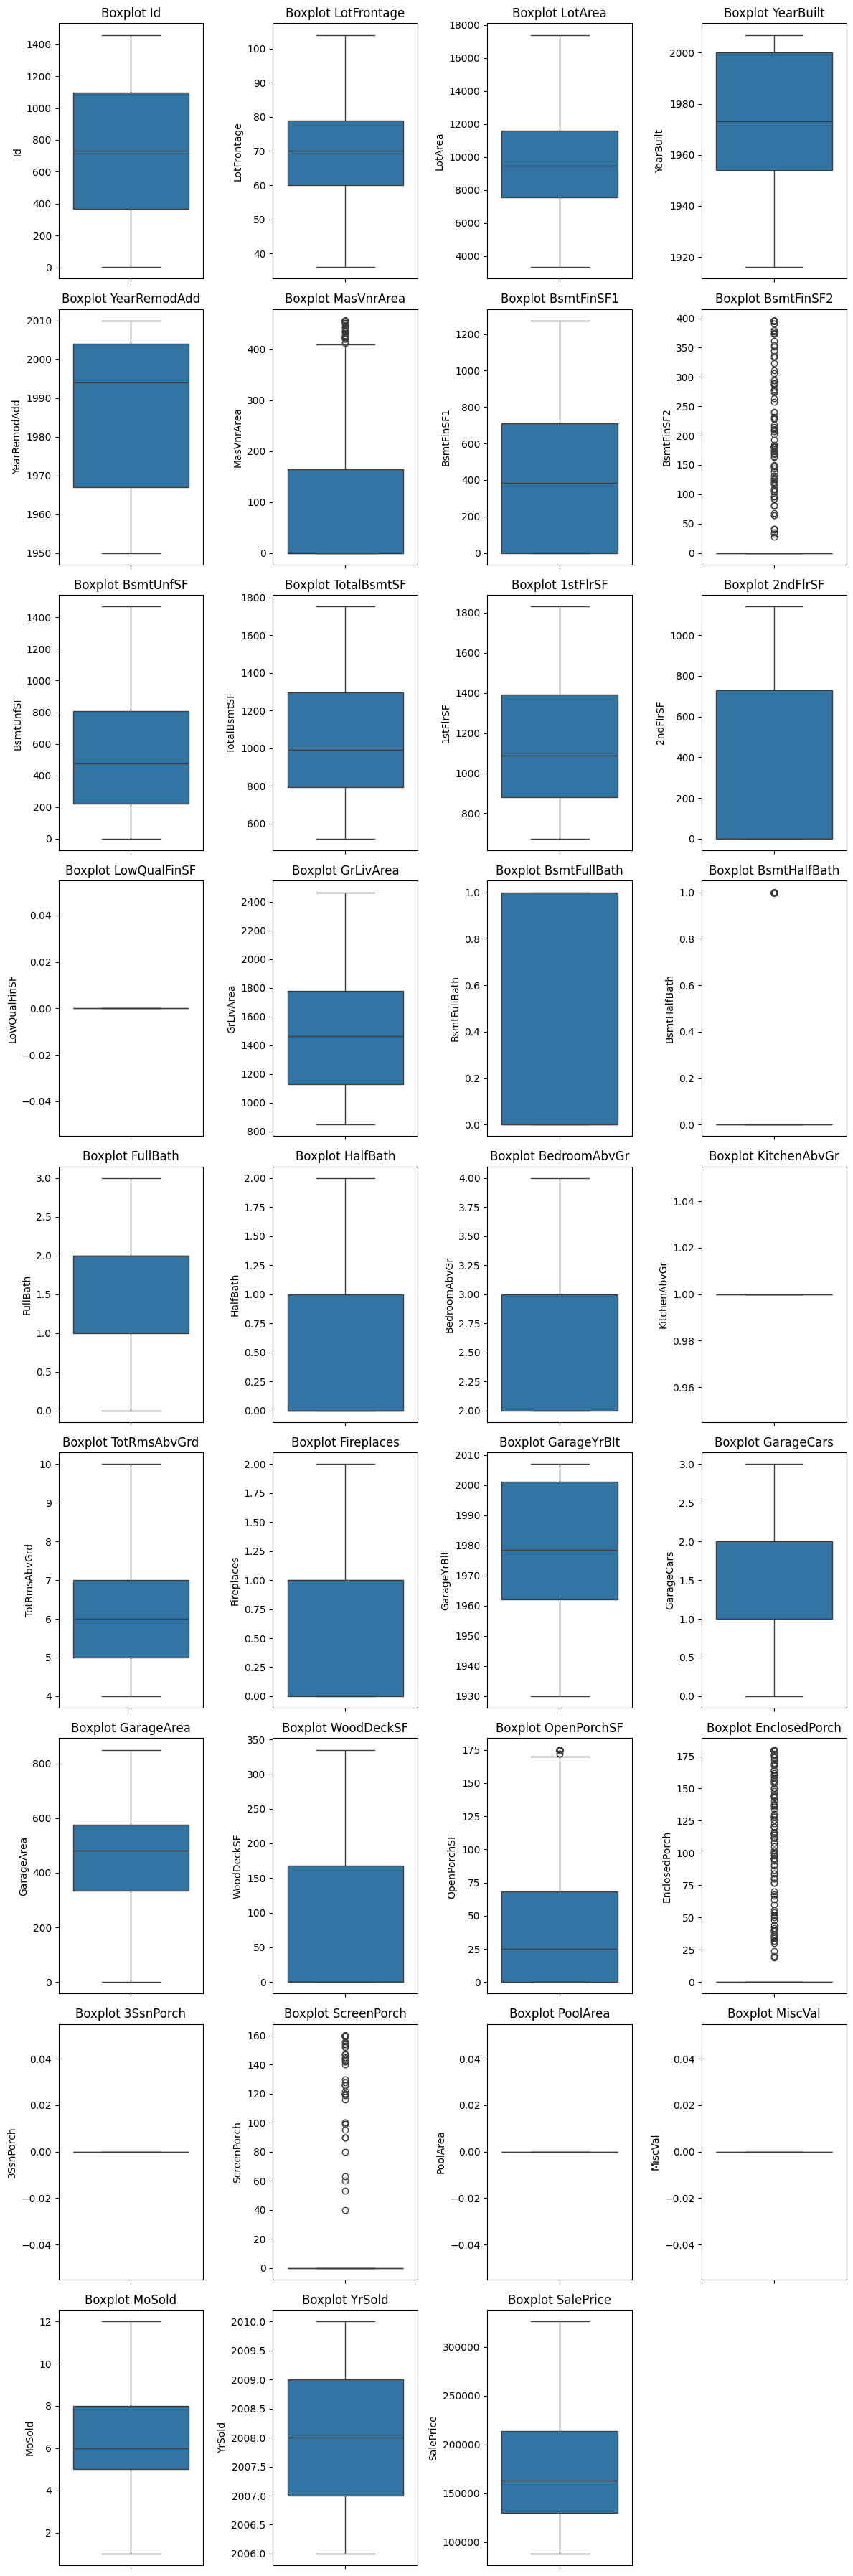

In [81]:
plot_boxplot(df_otc)

In [84]:
kolom_outlier2 = detect_outliers_columns(df_otc)

jumlah_kolom_outlier2 = len(kolom_outlier2)

print("Kolom dengan outlier:")
print(kolom_outlier2)
print("Jumlah kolom dengan outlier:", jumlah_kolom_outlier2)

Kolom dengan outlier:
['MasVnrArea', 'BsmtFinSF2', 'BsmtHalfBath', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch']
Jumlah kolom dengan outlier: 6


## **Memeriksa imbalance data dan menyelesaikan masalah imbalance data jika ada.**

### **Memeriksa imbalance data**

#### Data Kategorikal

In [85]:
def plot_categorical_histograms(df, figsize=(40, 86)): 
    num_cols = 3
    object_columns = df.select_dtypes(include='object').columns
    num_plots = len(object_columns)
    num_rows = num_plots // num_cols
    if num_plots % num_cols:
        num_rows += 1

    fig = plt.figure(figsize=figsize)
    plot_count = 0 
    
    for i, column in enumerate(object_columns):
        if df[column].nunique() > 10:
            figsize_custom = (24, 12)
            plt.figure(figsize=figsize_custom)
            sns.countplot(data=df, x=column, color='skyblue')
            plt.title(f'Count Plot {column}')
            plt.tight_layout()
            continue  
        else:
            plot_count += 1
            ax = fig.add_subplot(num_rows, num_cols, plot_count)
            sns.countplot(data=df, x=column, ax=ax, color='skyblue')
            ax.set_title(f'Count Plot {column}')       
    for i in range(num_plots, num_rows * num_cols):
        plt.delaxes(plt.subplot(num_rows, num_cols, i + 1))
        
    plt.tight_layout()
    plt.show()

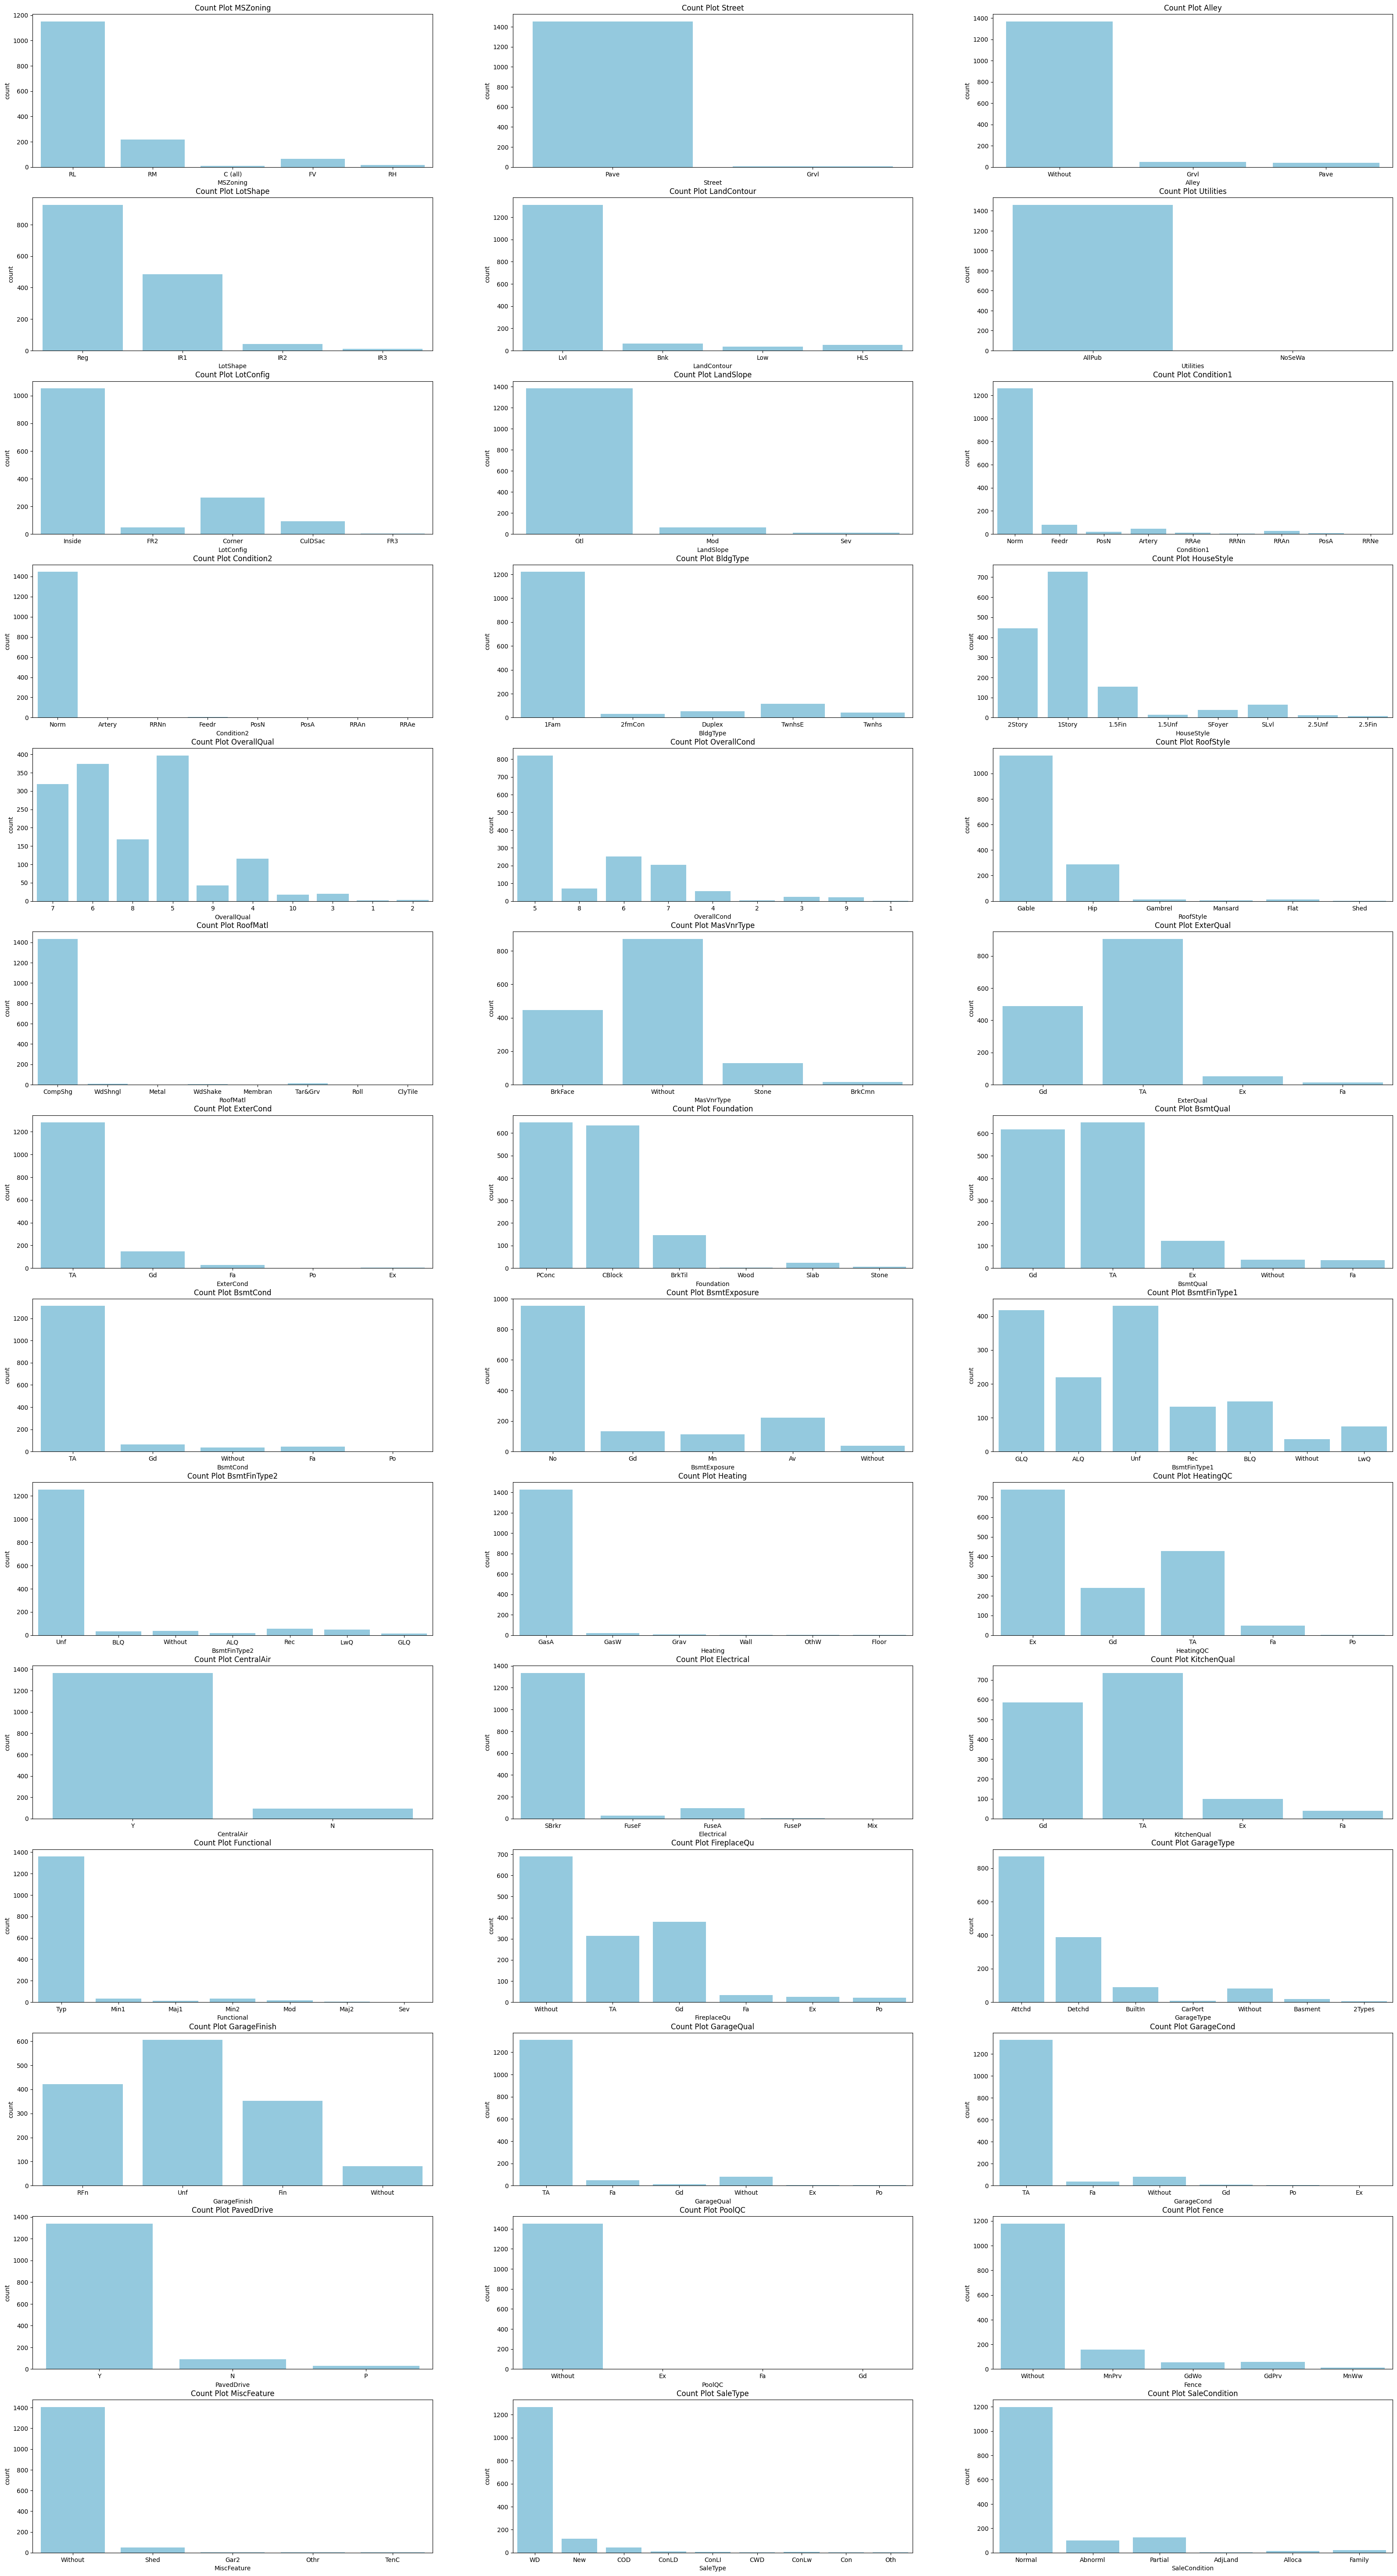

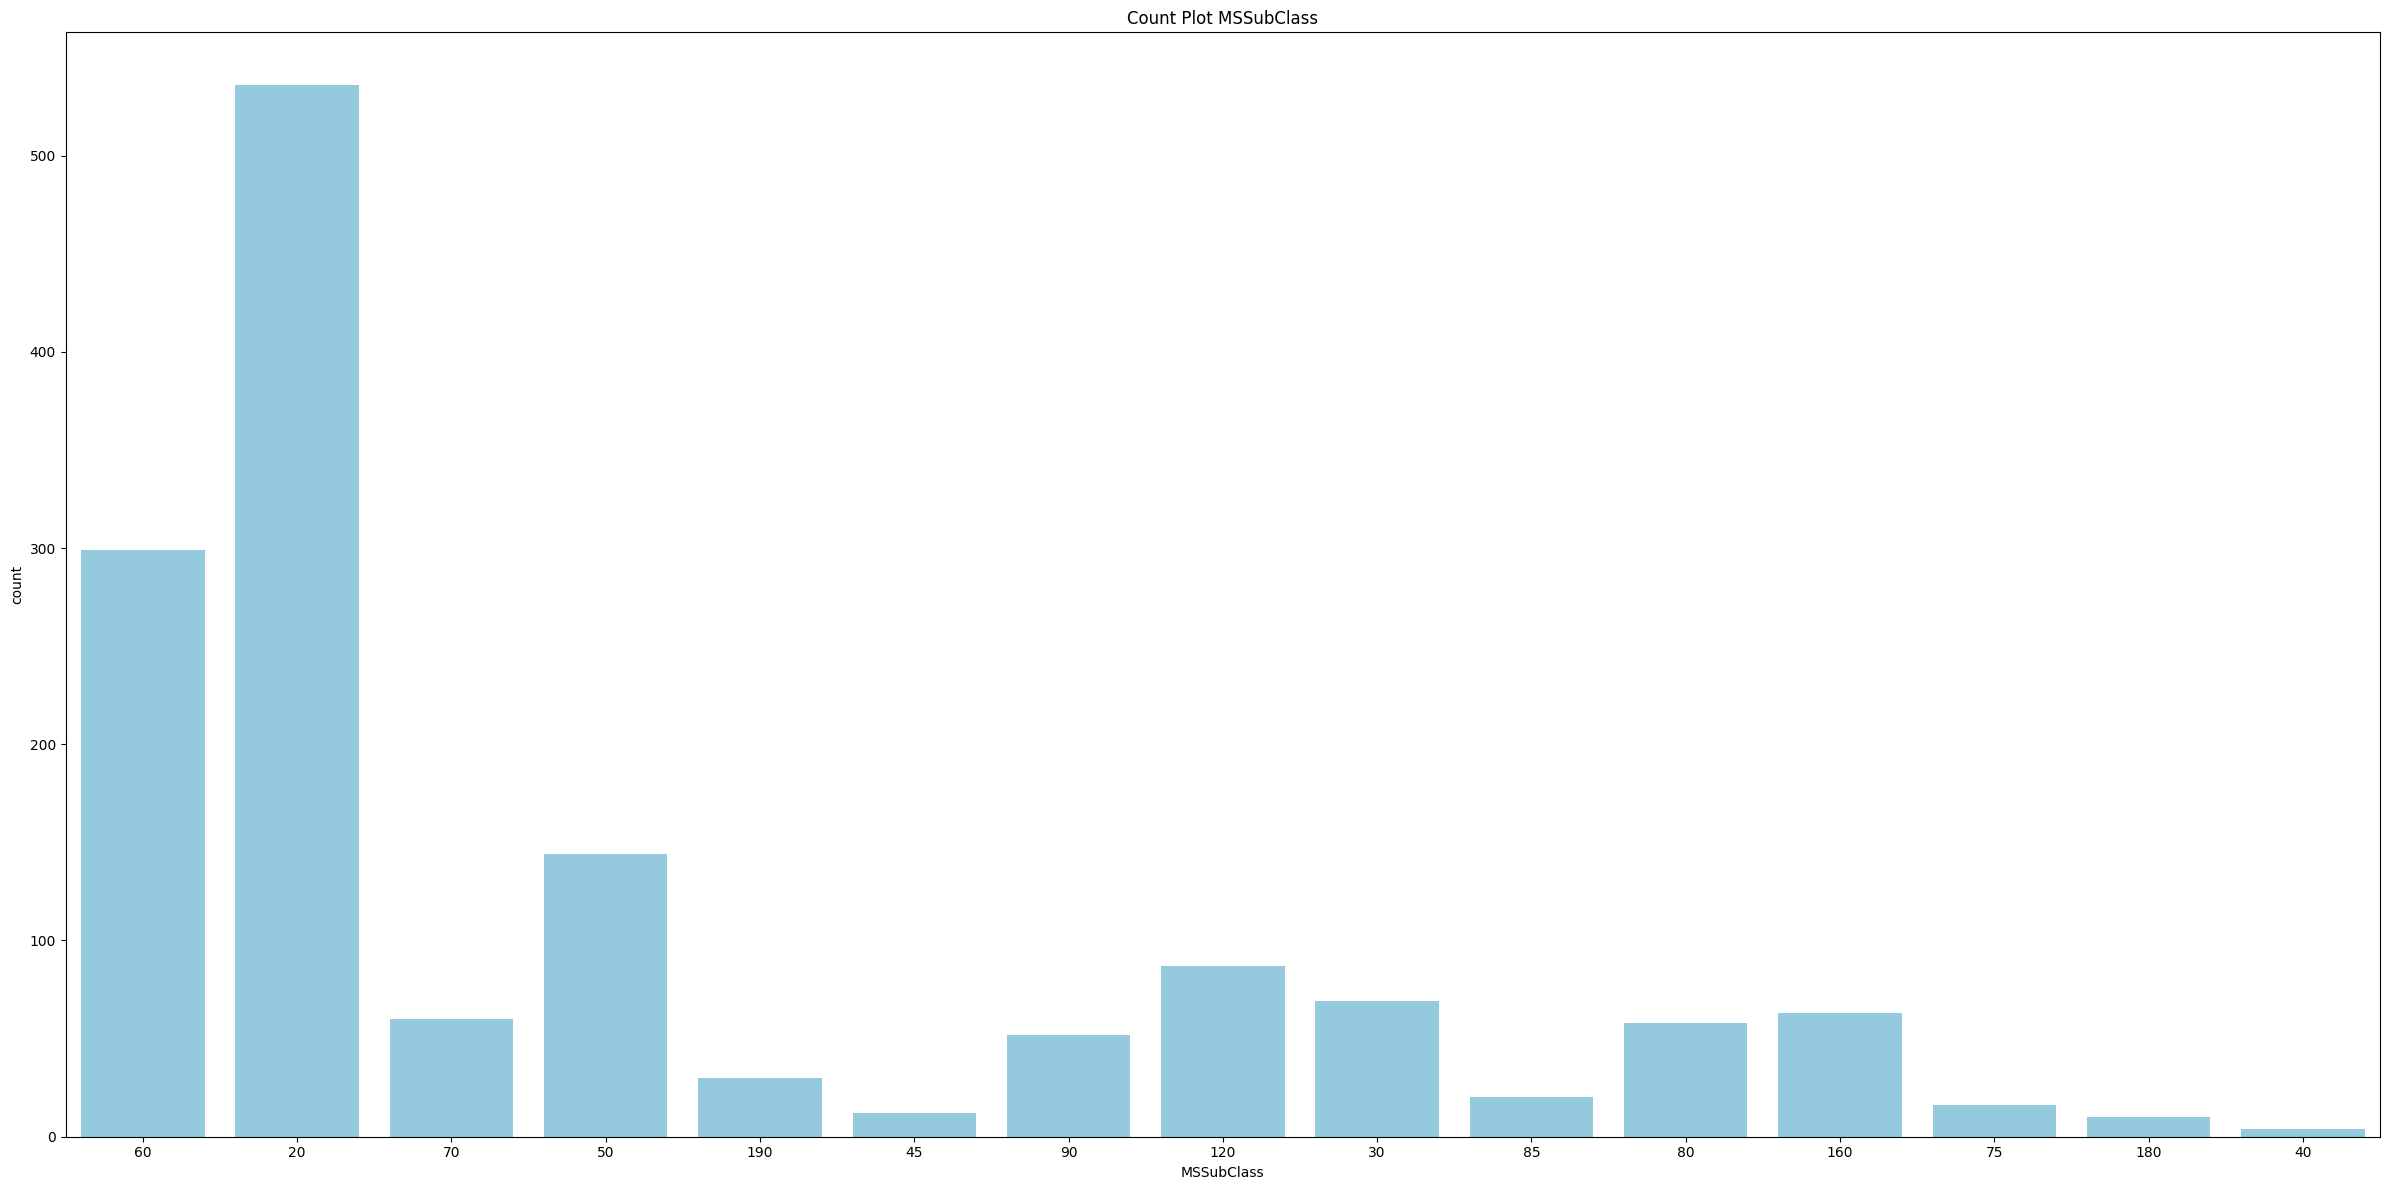

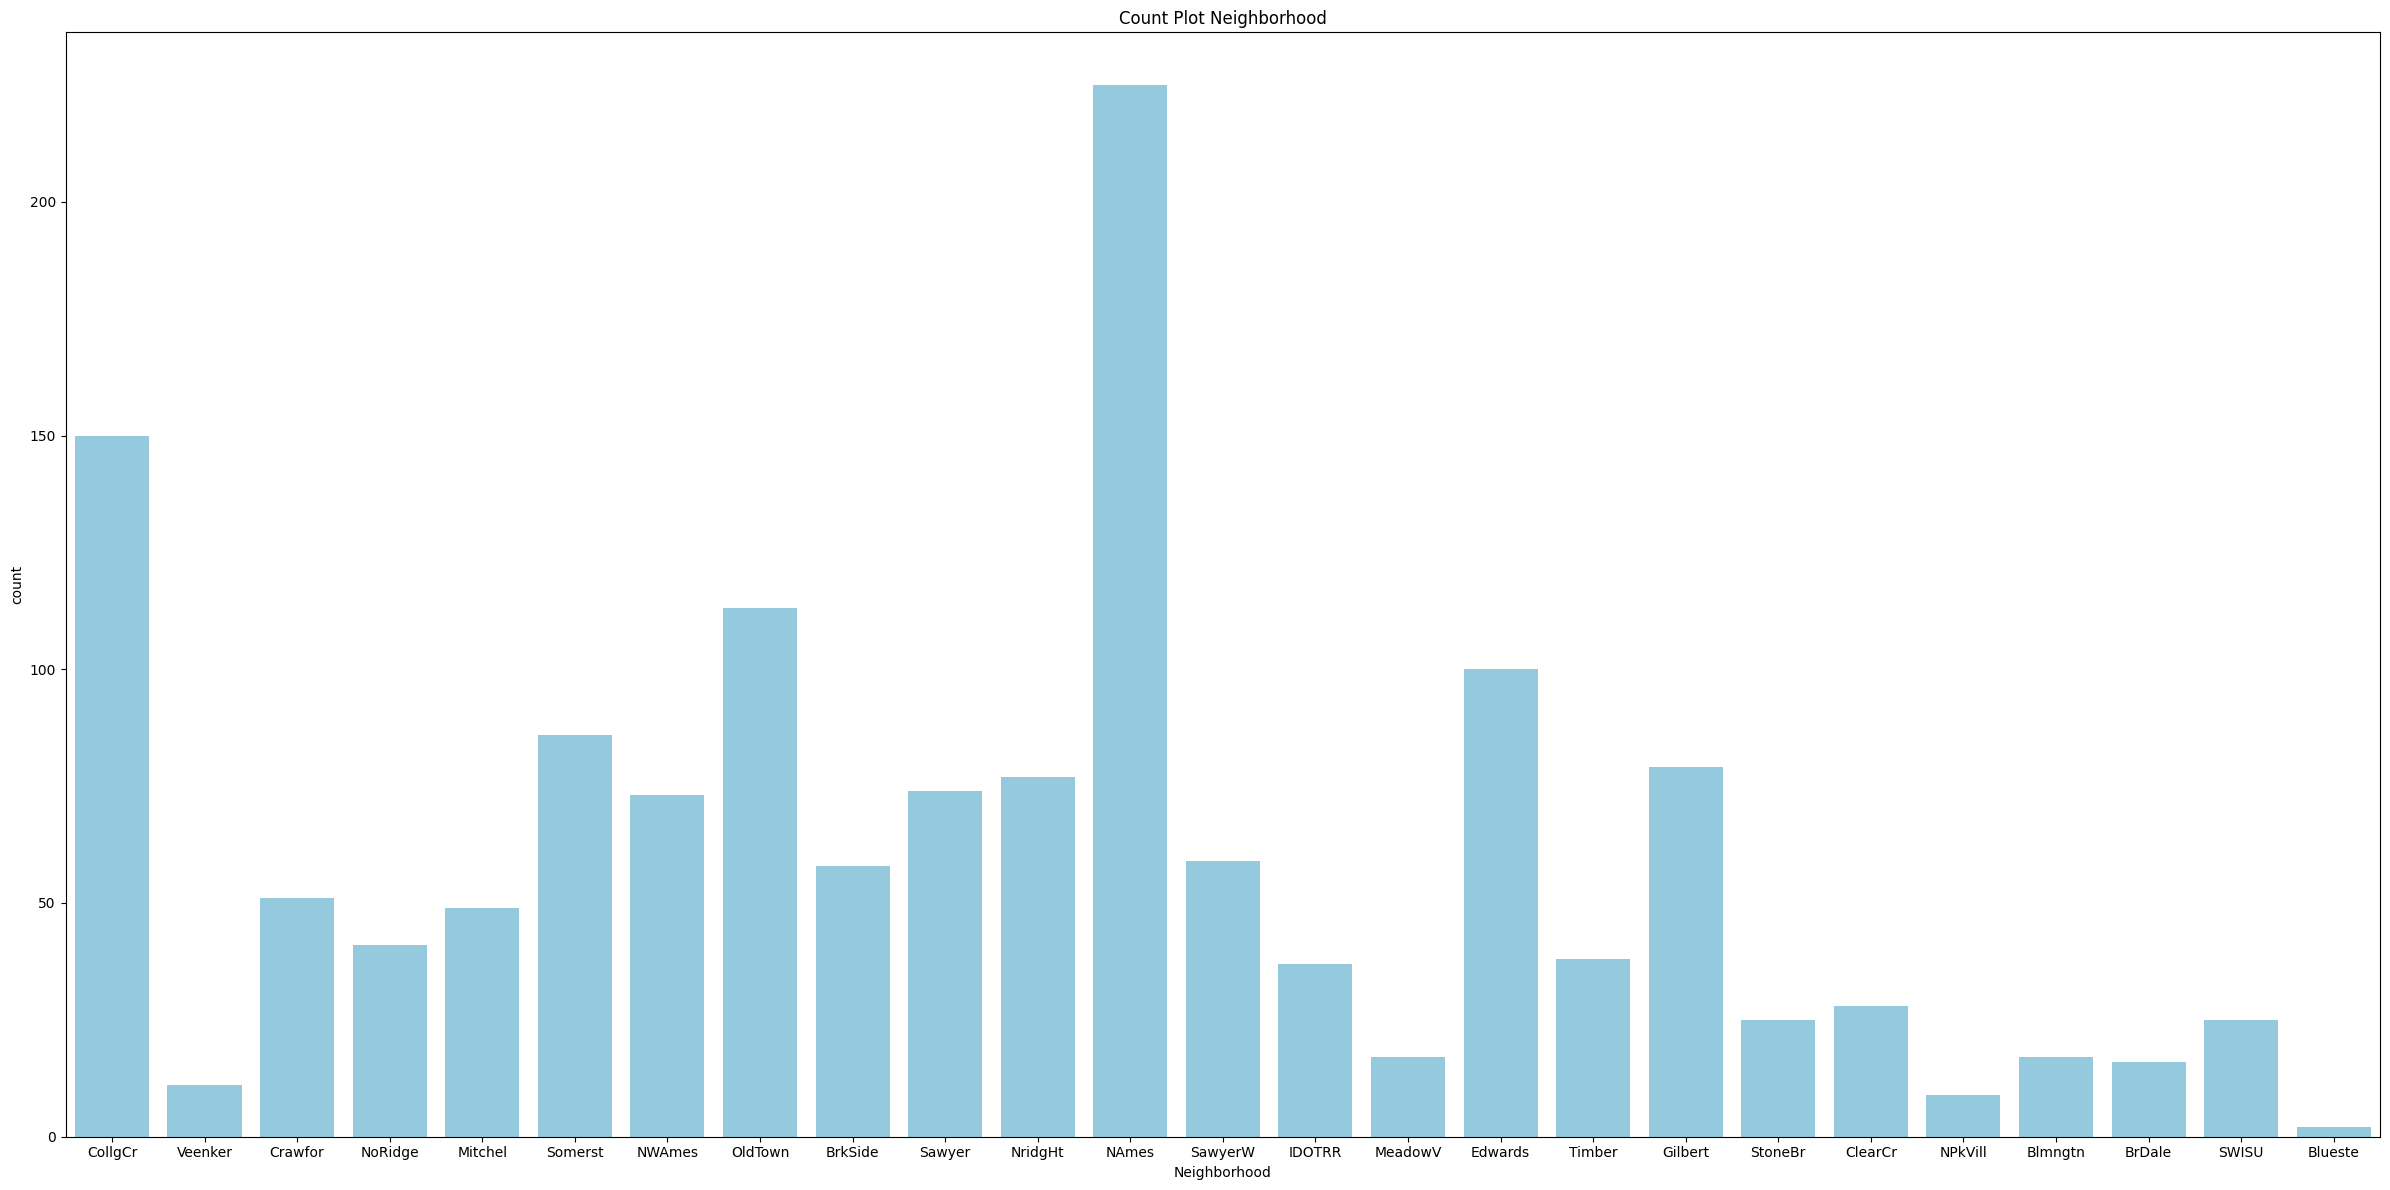

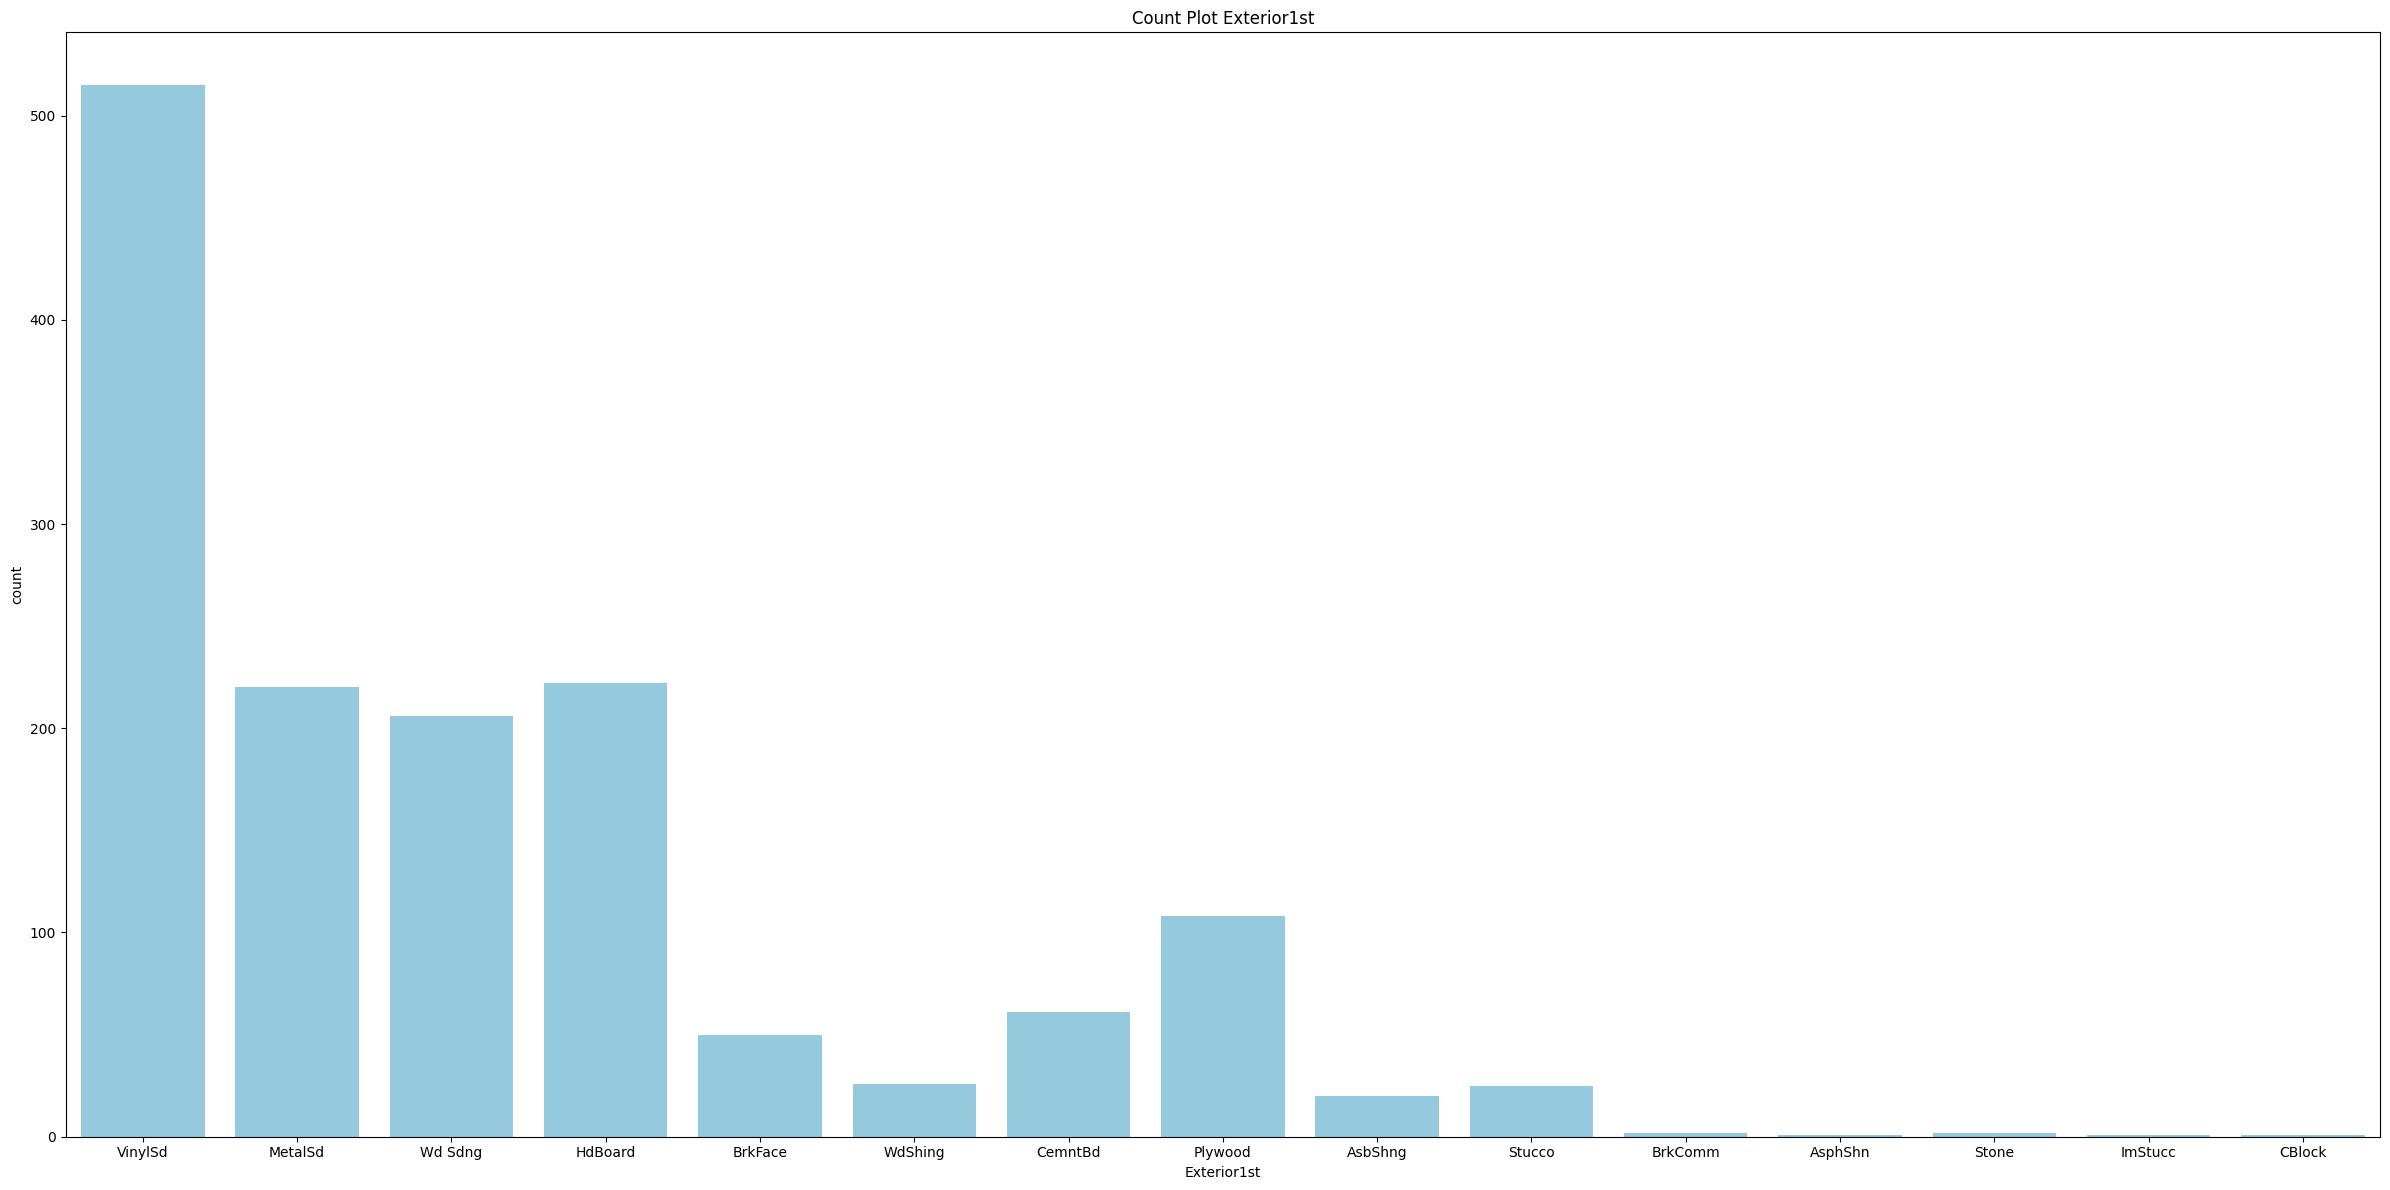

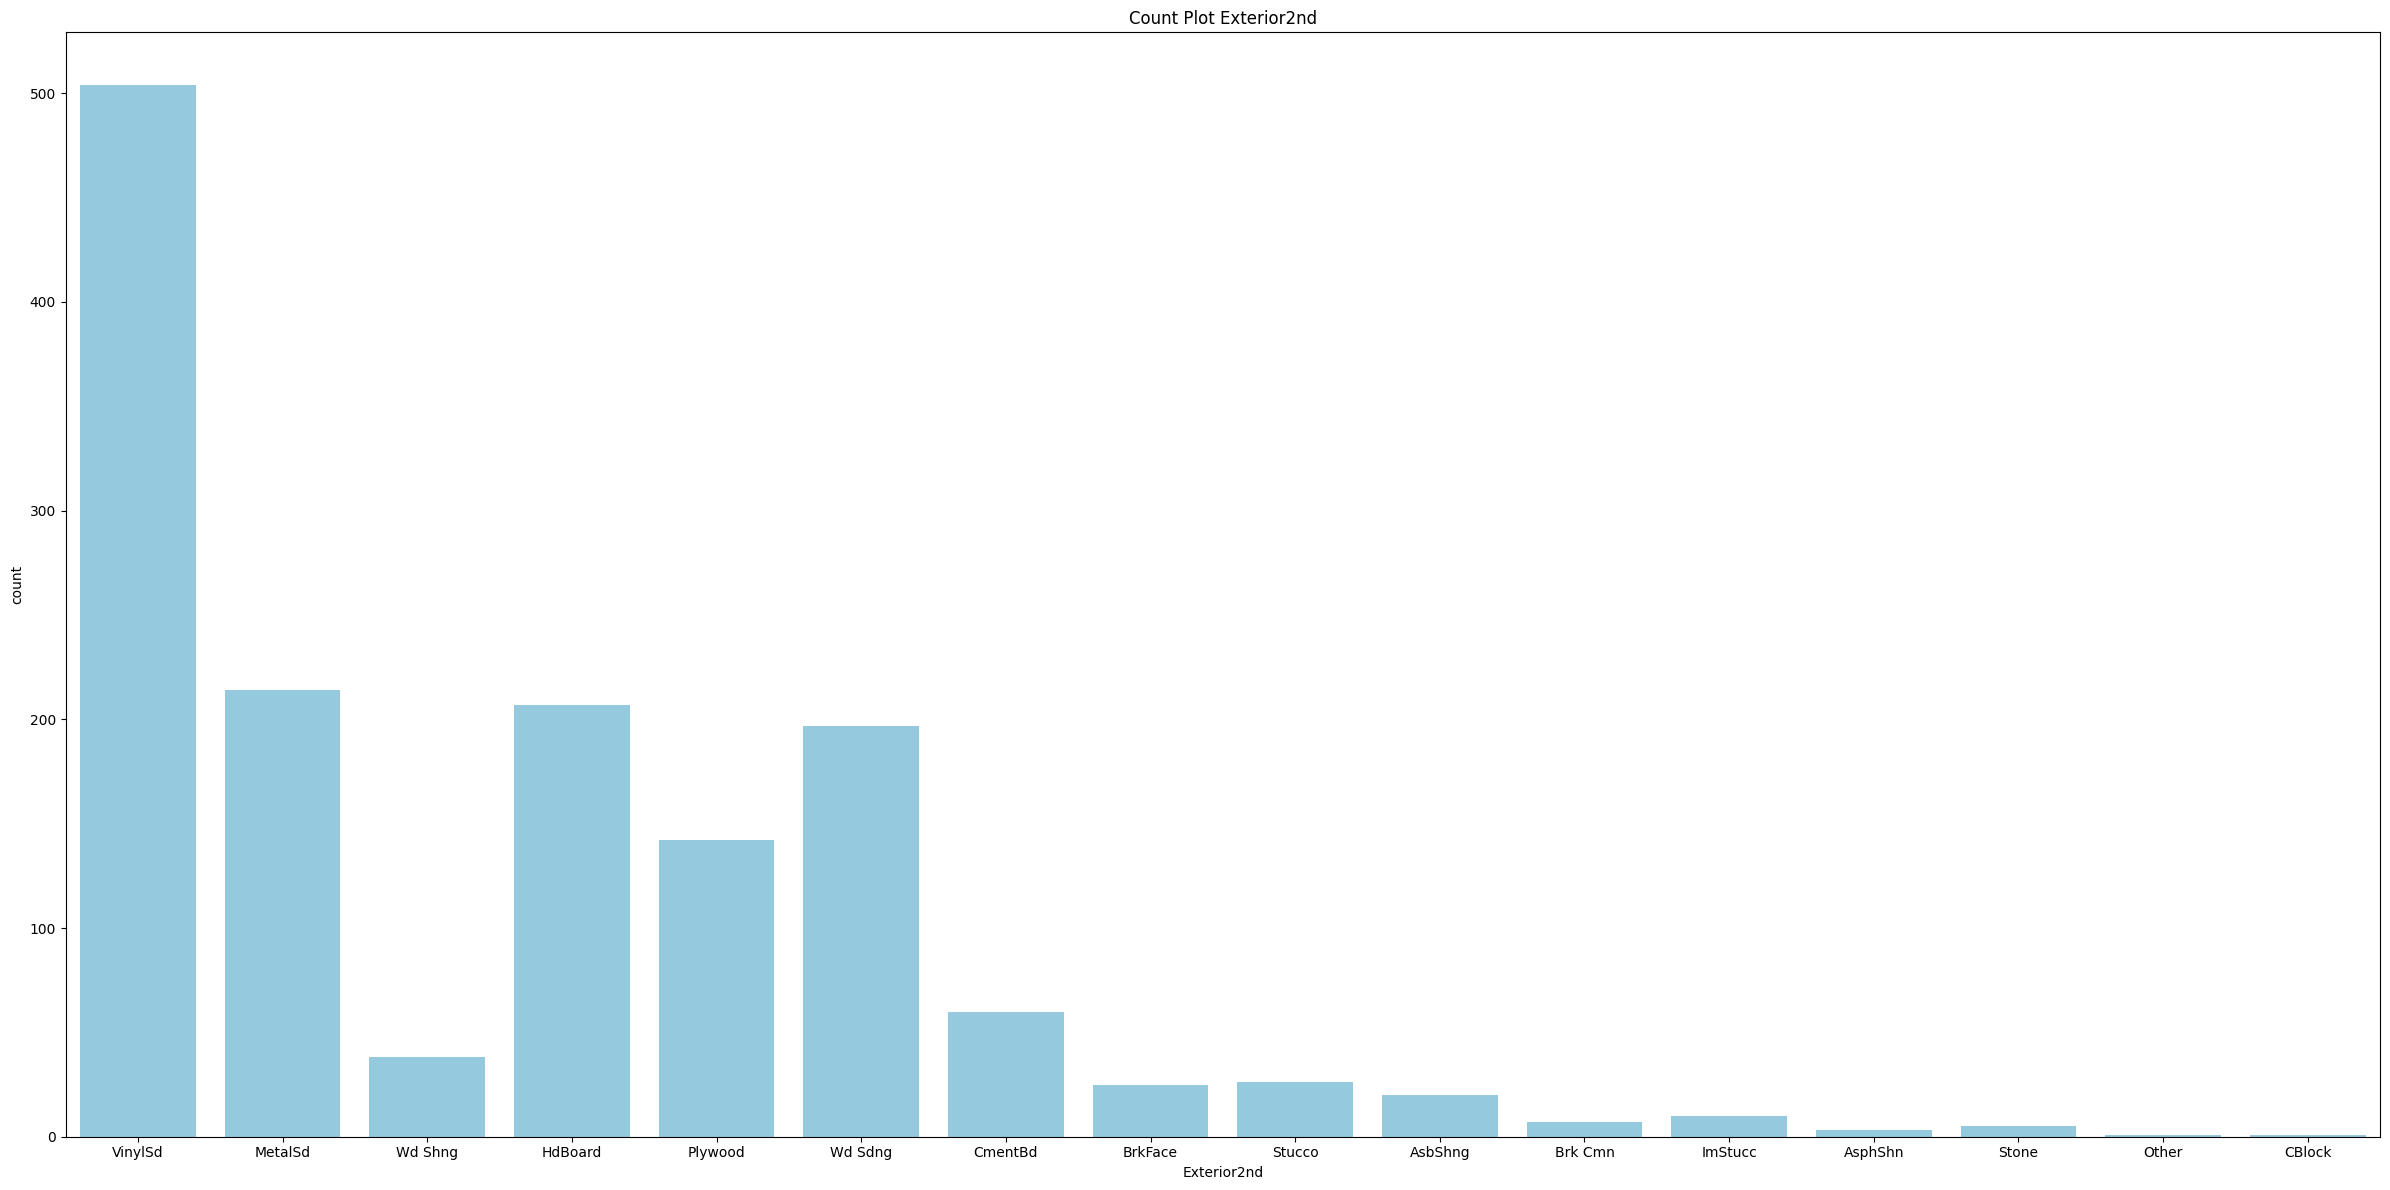

In [86]:
plot_categorical_histograms(df_otc)

#### Data Numerik

In [254]:
def plot_numeric_columns_histogram_subplots(data):
    numeric_columns = data.select_dtypes(include='number').columns
    num_plots = len(numeric_columns)
    num_cols = 4
    num_rows = num_plots // num_cols
    if num_plots % num_cols:
        num_rows += 1
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(30, 60))
    
    for i, column in enumerate(numeric_columns):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col]
        
        sns.histplot(data[column], kde=True, ax=ax, color='skyblue')
        ax.set_title(f'Histogram of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
        ax.grid(False)
    
    for i in range(num_plots, num_rows * num_cols):
        plt.delaxes(plt.subplot(num_rows, num_cols, i + 1))
    
    plt.show()

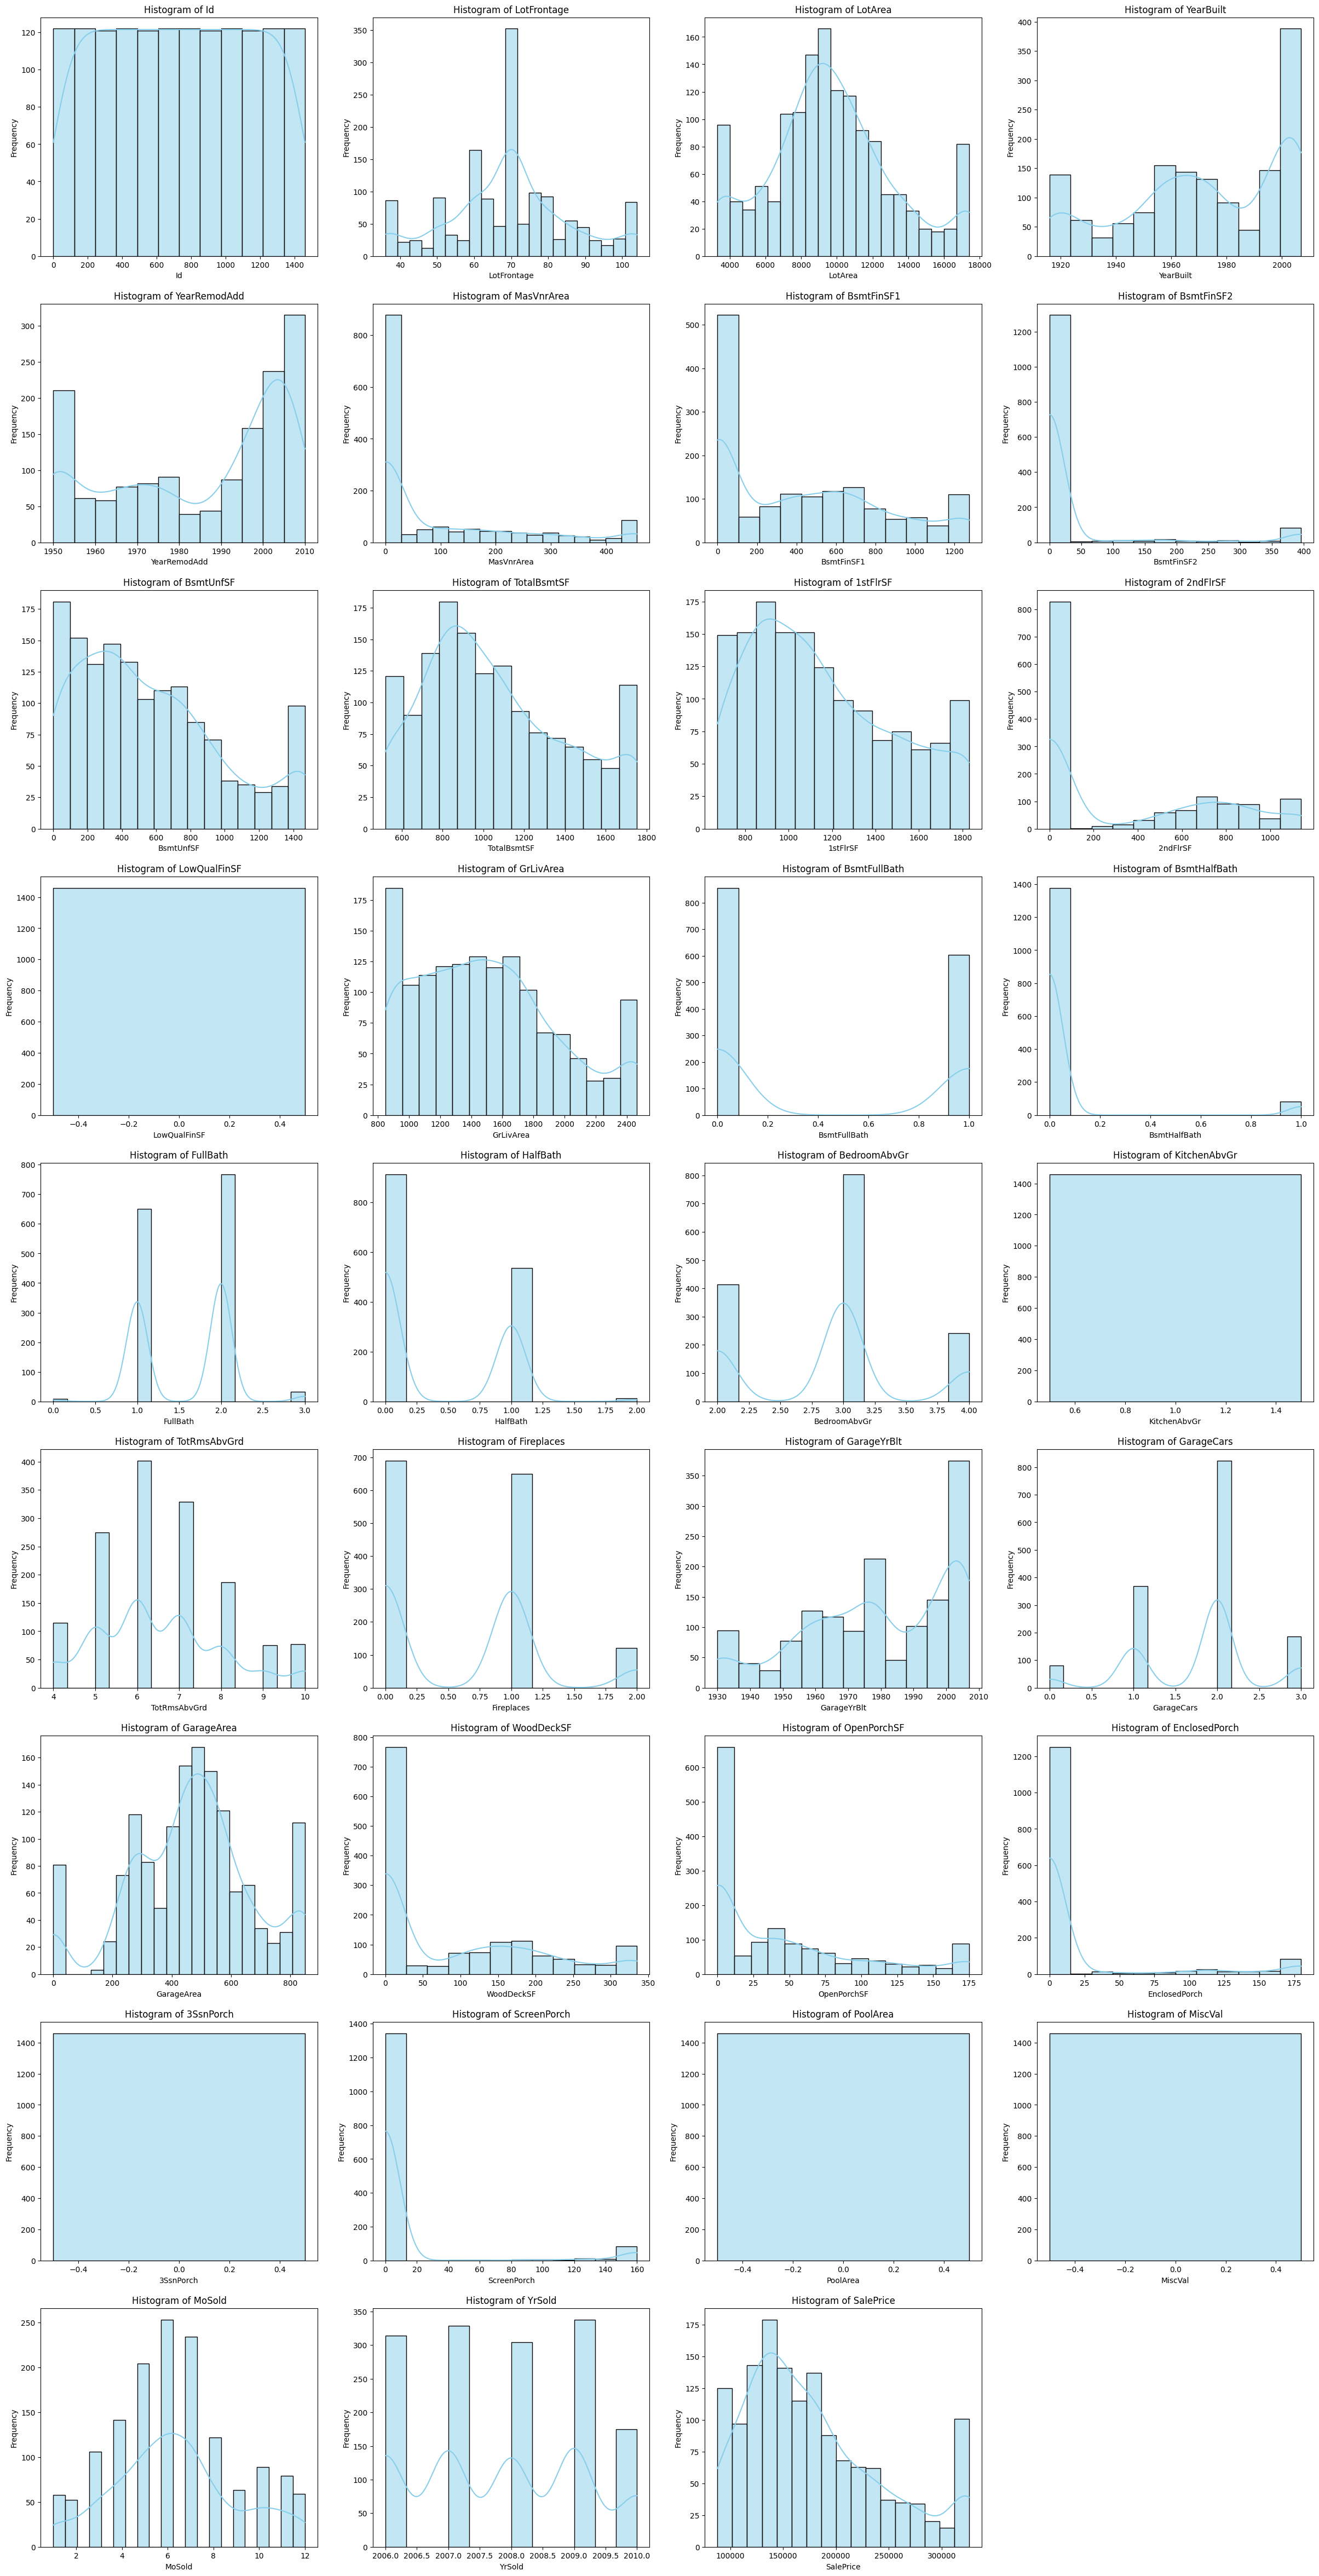

In [255]:
plot_numeric_columns_histogram_subplots(df_otc)

#### Fungsi Check Imbalance

In [88]:
def check_imbalance_columns(data, imbalance_threshold=0.1, id_column='Id'):
    imbalance_columns = []
    balance_columns = []
    for column in data.columns:
        if column != id_column:
            class_proportions = data[column].value_counts(normalize=True)
        
            if any(class_proportions < imbalance_threshold):
                imbalance_columns.append(column)
            else:
                balance_columns.append(column)

    return imbalance_columns, balance_columns

In [89]:
imbalance_columns, balance_columns = check_imbalance_columns(df_otc)
jumlah_kolomi = len(imbalance_columns)
jumlah_kolomb = len(balance_columns)
print("Kolom dengan ketidakseimbangan data:", imbalance_columns)
print(jumlah_kolomi)
print("Kolom dengan keseimbangan data:", balance_columns)
print(jumlah_kolomb)

Kolom dengan ketidakseimbangan data: ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondi

### **Melakukan feature encoding jika diperlukan**

In [45]:
def auto_label_encode_categorical_data(df):
    df_copy = df.copy()
    categorical_columns = df_copy.select_dtypes(include=['object']).columns.tolist()
    label_encoder = LabelEncoder()
    for column in categorical_columns:
        df_copy[column] = label_encoder.fit_transform(df_copy[column])

    return df_copy

In [90]:
df_encoded = auto_label_encode_categorical_data(df_otc)

In [91]:
df_encoded

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0        1           9         3         65.0     8450       1      2   
1        2           4         3         80.0     9600       1      2   
2        3           9         3         68.0    11250       1      2   
3        4          10         3         60.0     9550       1      2   
4        5           9         3         84.0    14260       1      2   
...    ...         ...       ...          ...      ...     ...    ...   
1455  1456           9         3         62.0     7917       1      2   
1456  1457           4         3         85.0    13175       1      2   
1457  1458          10         3         66.0     9042       1      2   
1458  1459           4         3         68.0     9717       1      2   
1459  1460           4         3         75.0     9937       1      2   

      LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
0            3            3          0  ...         0       3      4   
1            3            3          0  ...         0       3      4   
2            0            3          0  ...         0       3      4   
3            0            3          0  ...         0       3      4   
4            0            3          0  ...         0       3      4   
...        ...          ...        ...  ...       ...     ...    ...   
1455         3            3          0  ...         0       3      4   
1456         3            3          0  ...         0       3      2   
1457         3            3          0  ...         0       3      0   
1458         3            3          0  ...         0       3      4   
1459         3            3          0  ...         0       3      4   

      MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0               4        0       2    2008         8              4     208500  
1               4        0       5    2007         8              4     181500  
2               4        0       9    2008         8              4     223500  
3               4        0       2    2006         8              0     140000  
4               4        0      12    2008         8              4     250000  
...           ...      ...     ...     ...       ...            ...        ...  
1455            4        0       8    2007         8              4     175000  
1456            4        0       2    2010         8              4     210000  
1457            2        0       5    2010         8              4     266500  
1458            4        0       4    2010         8              4     142125  
1459            4        0       6    2008         8              4     147500  

[1460 rows x 81 columns]

### **Mengatasi Masalah Imbalance Data**

#### Target Column (SalePrice)

In [273]:
def apply_oversampling(df, target_column):
    X = df.drop(columns=[target_column])
    y = df[target_column]
    oversampler = RandomOverSampler()
    X_resampled, y_resampled = oversampler.fit_resample(X, y)
    df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=[target_column])], axis=1)
    return df_resampled


In [276]:
# Contoh penggunaan
df_resampled_random = apply_oversampling(df_encoded, 'SalePrice')

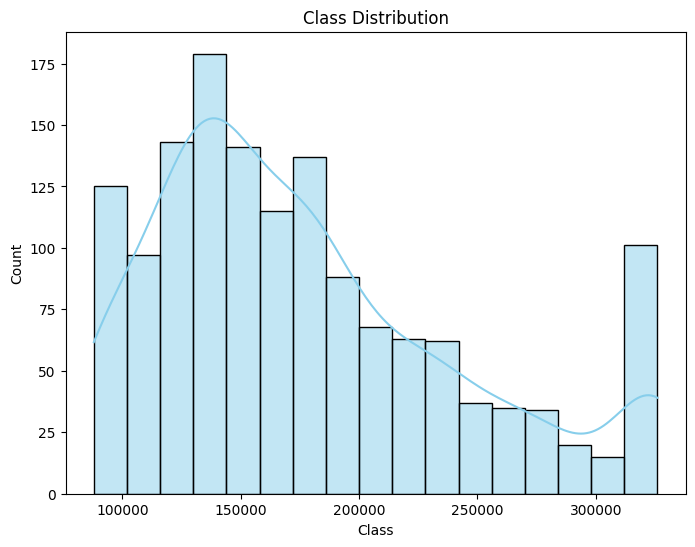

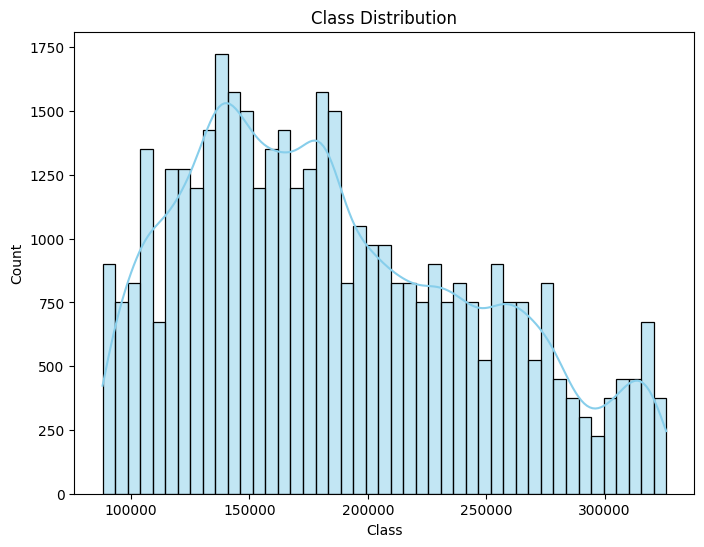

In [279]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi untuk plotting distribusi kelas
def plot_class_distribution(df, target_column):
    plt.figure(figsize=(8, 6))
    sns.histplot(x=target_column, kde=True, data=df, color='skyblue')
    plt.title('Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

# Plot distribusi kelas sebelum resampling
plot_class_distribution(df_encoded, 'SalePrice')
# Plot distribusi kelas setelah resampling
plot_class_distribution(df_resampled_random, 'SalePrice')



In [278]:
imbalance_columns3, balance_columns3 = check_imbalance_columns(df_resampled_random)
jumlah_kolomi3 = len(imbalance_columns3)
jumlah_kolomb3 = len(balance_columns3)
print("Kolom dengan ketidakseimbangan data:", imbalance_columns3)
print(jumlah_kolomi3)
print("Kolom dengan seimbangan data:", balance_columns3)
print(jumlah_kolomb3)

Kolom dengan ketidakseimbangan data: ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondi

# **Exploratory Data Analysis (EDA)**

In [236]:
# 2. Elaborasi Fitur dan Tipe Data
# Identifikasi dan deskripsikan setiap fitur
print("Informasi Dataset:")
print(df_encoded.info())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int32  
 2   MSZoning       1460 non-null   int32  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int32  
 6   Alley          1460 non-null   int32  
 7   LotShape       1460 non-null   int32  
 8   LandContour    1460 non-null   int32  
 9   Utilities      1460 non-null   int32  
 10  LotConfig      1460 non-null   int32  
 11  LandSlope      1460 non-null   int32  
 12  Neighborhood   1460 non-null   int32  
 13  Condition1     1460 non-null   int32  
 14  Condition2     1460 non-null   int32  
 15  BldgType       1460 non-null   int32  
 16  HouseStyle     1460 non-null   int32  
 17  OverallQual    1460 non-null   in

In [237]:
# Tentukan tipe data setiap fitur
print("\nTipe Data Setiap Fitur:")
print(df_encoded.dtypes)


Tipe Data Setiap Fitur:
Id                 int64
MSSubClass         int32
MSZoning           int32
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType           int32
SaleCondition      int32
SalePrice          int64
Length: 81, dtype: object


In [239]:
# 3. Penggunaan Mean, Median, dan Modus
# Hitung mean, median, dan modus untuk fitur numerik
print("\nStatistik Deskriptif untuk Fitur Numerik:")
df_encoded.describe()


Statistik Deskriptif untuk Fitur Numerik:


Id   MSSubClass     MSZoning  LotFrontage       LotArea  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    730.500000     6.214384     3.028767    69.301328   9682.476712   
std     421.610009     3.543318     0.632017    16.507563   3469.444734   
min       1.000000     0.000000     0.000000    36.000000   3316.000000   
25%     365.750000     4.000000     3.000000    60.000000   7553.500000   
50%     730.500000     5.000000     3.000000    70.049958   9478.500000   
75%    1095.250000     9.000000     3.000000    79.000000  11601.500000   
max    1460.000000    14.000000     4.000000   104.000000  17400.000000   

            Street        Alley     LotShape  LandContour    Utilities  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean      0.995890     1.903425     1.942466     2.777397     0.000685  ...   
std       0.063996     0.394776     1.409156     0.707666     0.026171  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       1.000000     2.000000     0.000000     3.000000     0.000000  ...   
50%       1.000000     2.000000     3.000000     3.000000     0.000000  ...   
75%       1.000000     2.000000     3.000000     3.000000     0.000000  ...   
max       1.000000     2.000000     3.000000     3.000000     1.000000  ...   

       PoolArea       PoolQC        Fence  MiscFeature  MiscVal       MoSold  \
count    1460.0  1460.000000  1460.000000  1460.000000   1460.0  1460.000000   
mean        0.0     2.991096     3.504795     3.922603      0.0     6.321918   
std         0.0     0.140703     1.082912     0.404103      0.0     2.703626   
min         0.0     0.000000     0.000000     0.000000      0.0     1.000000   
25%         0.0     3.000000     4.000000     4.000000      0.0     5.000000   
50%         0.0     3.000000     4.000000     4.000000      0.0     6.000000   
75%         0.0     3.000000     4.000000     4.000000      0.0     8.000000   
max         0.0     3.000000     4.000000     4.000000      0.0    12.000000   

            YrSold     SaleType  SaleCondition      SalePrice  
count  1460.000000  1460.000000    1460.000000    1460.000000  
mean   2007.815753     7.513014       3.770548  177359.339726  
std       1.328095     1.552100       1.100854   64551.108307  
min    2006.000000     0.000000       0.000000   88000.000000  
25%    2007.000000     8.000000       4.000000  129975.000000  
50%    2008.000000     8.000000       4.000000  163000.000000  
75%    2009.000000     8.000000       4.000000  214000.000000  
max    2010.000000     8.000000       5.000000  326000.000000  

[8 rows x 81 columns]

In [240]:

# 4. Statistika Five Summaries
# Temukan lima ringkasan statistik untuk setiap fitur numerik
print("\nLima Ringkasan Statistik untuk Fitur Numerik:")
df_encoded.describe().loc[['min', '25%', '50%', '75%', 'max']]


Lima Ringkasan Statistik untuk Fitur Numerik:


Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
min     1.00         0.0       0.0    36.000000   3316.0     0.0    0.0   
25%   365.75         4.0       3.0    60.000000   7553.5     1.0    2.0   
50%   730.50         5.0       3.0    70.049958   9478.5     1.0    2.0   
75%  1095.25         9.0       3.0    79.000000  11601.5     1.0    2.0   
max  1460.00        14.0       4.0   104.000000  17400.0     1.0    2.0   

     LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
min       0.0          0.0        0.0  ...       0.0     0.0    0.0   
25%       0.0          3.0        0.0  ...       0.0     3.0    4.0   
50%       3.0          3.0        0.0  ...       0.0     3.0    4.0   
75%       3.0          3.0        0.0  ...       0.0     3.0    4.0   
max       3.0          3.0        1.0  ...       0.0     3.0    4.0   

     MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
min          0.0      0.0     1.0  2006.0       0.0            0.0    88000.0  
25%          4.0      0.0     5.0  2007.0       8.0            4.0   129975.0  
50%          4.0      0.0     6.0  2008.0       8.0            4.0   163000.0  
75%          4.0      0.0     8.0  2009.0       8.0            4.0   214000.0  
max          4.0      0.0    12.0  2010.0       8.0            5.0   326000.0  

[5 rows x 81 columns]

In [270]:
def plot_distribution_histogram_subplots(data):
    numeric_columns = data.select_dtypes(include='number').columns
    num_plots = len(numeric_columns)
    num_cols = 3
    num_rows = num_plots // num_cols
    if num_plots % num_cols:
        num_rows += 1
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(24, 240))
    
    for i, column in enumerate(numeric_columns):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col]
        
        sns.histplot(data[column], kde=True, ax=ax, color='skyblue')
        ax.set_title(f'Distribusi {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
        ax.grid(False)
    
    for i in range(num_plots, num_rows * num_cols):
        plt.delaxes(plt.subplot(num_rows, num_cols, i + 1))
    
    plt.show()


Visualisasi Distribusi Data dari Setiap Kolom:


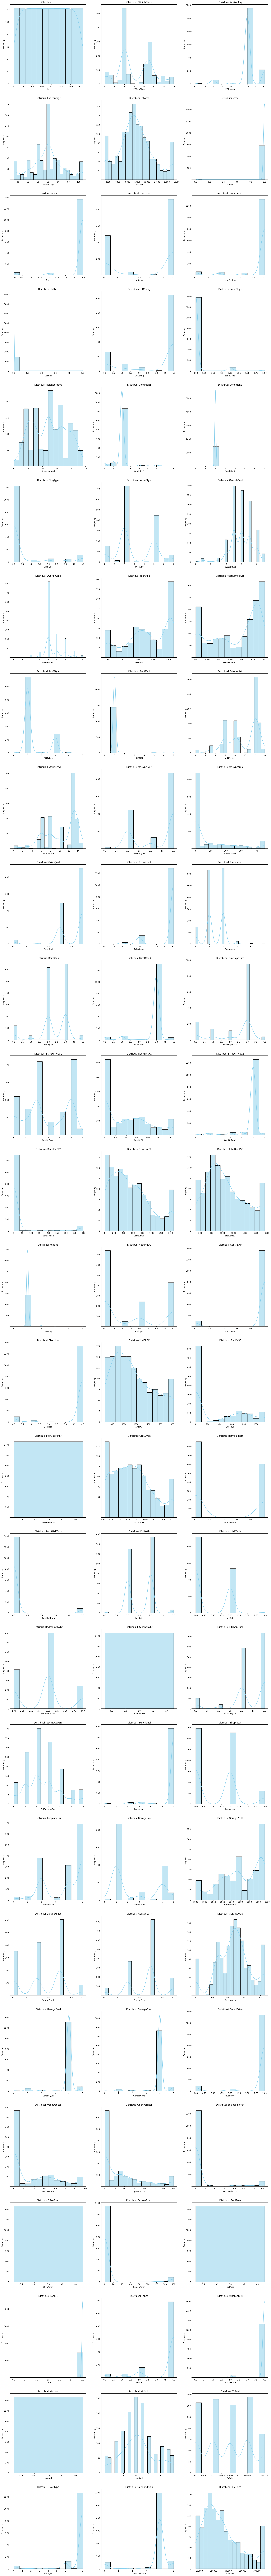

In [271]:
print("\nVisualisasi Distribusi Data dari Setiap Kolom:")
plot_distribution_histogram_subplots(df_encoded)